In [21]:
!pip install seaborn

In [22]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Scikit-learn utilities
from sklearn.datasets import load_breast_cancer 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.metrics import precision_recall_fscore_support


# Load data
df = pd.read_csv(r'C:\Users\Vai.Mathi\Downloads\ML-Final-Project\UCI_Credit_Card.csv')

print(df.head())



# List of categorical columns you want to inspect
categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE']

# Loop through each and print value counts
for col in categorical_cols:
    print(f'\nValue counts for {col}:')
    print(df[col].value_counts())





   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0   

In [23]:
def preprocess_credit_card_data(df):
    """
    Preprocesses the Credit Card Default dataset:
    - Cleans invalid entries in SEX, EDUCATION, and MARRIAGE
    - One-hot encodes categorical variables with 0/1 (not True/False)
    - Standard scales numerical variables
    - Returns full cleaned DataFrame
    """
    df = df.copy()  # Make a safe copy

    # 1. Drop 'ID' column (not useful)
    if 'ID' in df.columns:
        df = df.drop(columns=['ID'])

    # 2. Clean invalid entries
    df = df[df['SEX'].isin([1, 2])]
    df = df[df['EDUCATION'].isin([1, 2, 3])]
    df = df[df['MARRIAGE'].isin([1, 2, 3])]

    # 3. Identify features
    target = 'default.payment.next.month'
    feature_cols = [col for col in df.columns if col != target]
    categorical_cols = ['SEX', 'EDUCATION', 'MARRIAGE']
    numerical_cols = [col for col in feature_cols if col not in categorical_cols]

    # 4. One-hot encode categorical columns
    df = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

    # 🔵 Force dummy columns to be integers (0 and 1)
    dummy_cols = [col for col in df.columns if any(prefix in col for prefix in ['SEX_', 'EDUCATION_', 'MARRIAGE_'])]
    df[dummy_cols] = df[dummy_cols].astype(int)

    # 5. Standard scale numerical columns
    scaler = StandardScaler()
    df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

    # 6. Return the fully cleaned and transformed DataFrame
    return df



df = preprocess_credit_card_data(df)
print(df.head())

   LIMIT_BAL       AGE     PAY_0     PAY_2     PAY_3     PAY_4     PAY_5  \
0  -1.133563 -1.244592  1.790220  1.773659 -0.699006 -0.668711 -1.529242   
1  -0.364148 -1.027590 -0.877913  1.773659  0.134070  0.184043  0.230350   
2  -0.594973 -0.159582  0.011465  0.107186  0.134070  0.184043  0.230350   
3  -0.902738  0.165921  0.011465  0.107186  0.134070  0.184043  0.230350   
4  -0.902738  2.335940 -0.877913  0.107186 -0.699006  0.184043  0.230350   

      PAY_6  BILL_AMT1  BILL_AMT2  ...  PAY_AMT6  default.payment.next.month  \
0 -1.487392  -0.641214  -0.646452  ... -0.293220                           1   
1  1.983101  -0.657998  -0.665868  ... -0.180118                           1   
2  0.247855  -0.295909  -0.492407  ... -0.010466                           0   
3  0.247855  -0.053885  -0.010096  ... -0.236669                           0   
4  0.247855  -0.577078  -0.610242  ... -0.254822                           0   

   SEX_1  SEX_2  EDUCATION_1  EDUCATION_2  EDUCATION_3  MARRIA

C:\Users\Vai.Mathi\AppData\Local\Temp\ipykernel_37472\4004564318.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=y, y=X[col], ci=None)


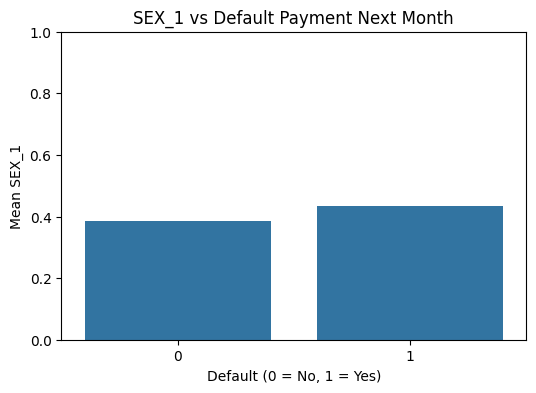

C:\Users\Vai.Mathi\AppData\Local\Temp\ipykernel_37472\4004564318.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=y, y=X[col], ci=None)


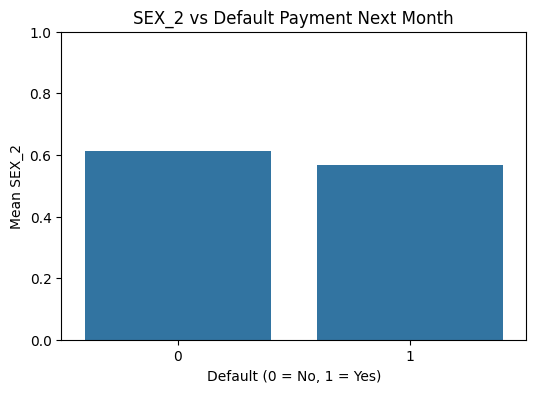

C:\Users\Vai.Mathi\AppData\Local\Temp\ipykernel_37472\4004564318.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=y, y=X[col], ci=None)


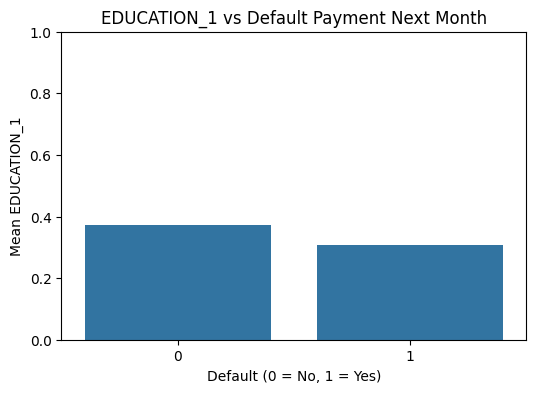

C:\Users\Vai.Mathi\AppData\Local\Temp\ipykernel_37472\4004564318.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=y, y=X[col], ci=None)


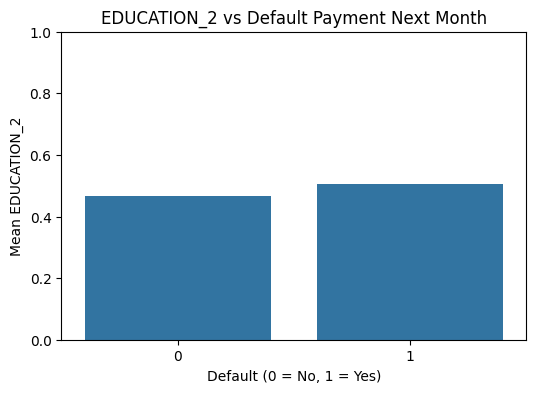

C:\Users\Vai.Mathi\AppData\Local\Temp\ipykernel_37472\4004564318.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=y, y=X[col], ci=None)


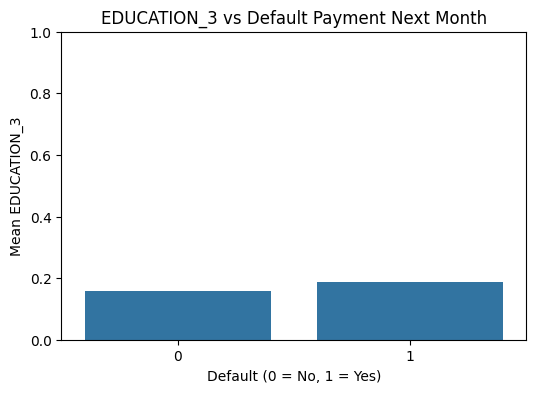

C:\Users\Vai.Mathi\AppData\Local\Temp\ipykernel_37472\4004564318.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=y, y=X[col], ci=None)


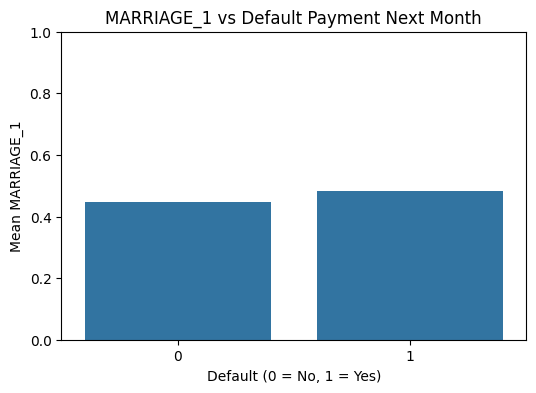

C:\Users\Vai.Mathi\AppData\Local\Temp\ipykernel_37472\4004564318.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=y, y=X[col], ci=None)


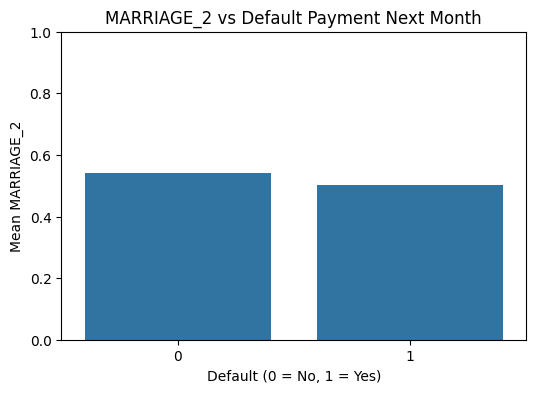

C:\Users\Vai.Mathi\AppData\Local\Temp\ipykernel_37472\4004564318.py:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=y, y=X[col], ci=None)


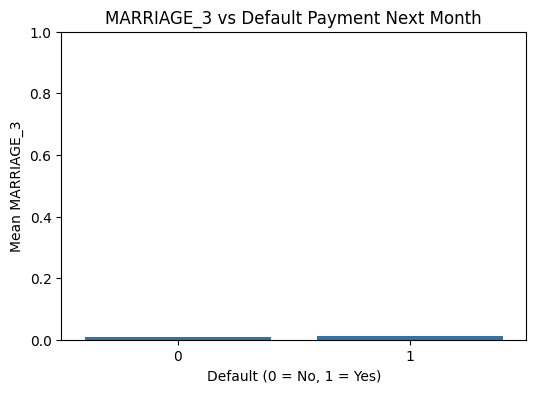

In [24]:
X = df.drop(columns=['default.payment.next.month'])
y = df['default.payment.next.month']

dummy_cols = [col for col in X.columns if col.startswith(('SEX_', 'EDUCATION_', 'MARRIAGE_'))]

# Plot default rates for each dummy column
for col in dummy_cols:
    plt.figure(figsize=(6, 4))
    
    # Calculate the mean of the dummy feature grouped by default outcome
    sns.barplot(x=y, y=X[col], ci=None)
    
    plt.title(f'{col} vs Default Payment Next Month')
    plt.xlabel('Default (0 = No, 1 = Yes)')
    plt.ylabel(f'Mean {col}')
    plt.ylim(0, 1)  # Since dummies are 0 or 1
    plt.show()

In [25]:
# Count how many 0s and 1s there are in MARRIAGE_3
# Count how many 0s and 1s there are in MARRIAGE_3
marriage_1_counts = X['MARRIAGE_1'].value_counts()

print("Counts for MARRIAGE_1:")
print(marriage_1_counts)

# Count how many 0s and 1s there are in MARRIAGE_3
marriage_2_counts = X['MARRIAGE_2'].value_counts()

print("Counts for MARRIAGE_2:")
print(marriage_2_counts)
marriage_3_counts = X['MARRIAGE_3'].value_counts()

print("Counts for MARRIAGE_3:")
print(marriage_3_counts)


Counts for MARRIAGE_1:
MARRIAGE_1
0    16053
1    13425
Name: count, dtype: int64
Counts for MARRIAGE_2:
MARRIAGE_2
1    15738
0    13740
Name: count, dtype: int64
Counts for MARRIAGE_3:
MARRIAGE_3
0    29163
1      315
Name: count, dtype: int64


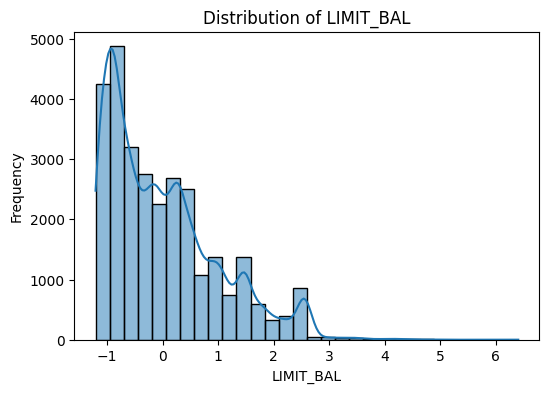

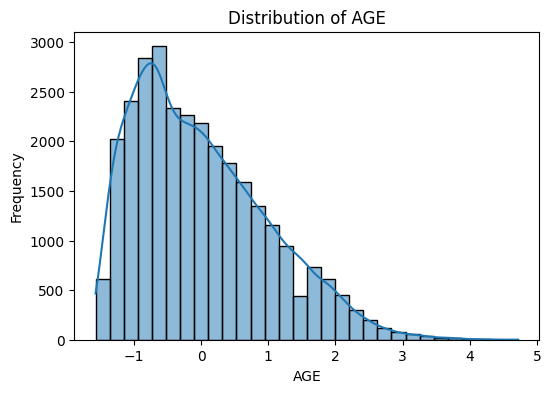

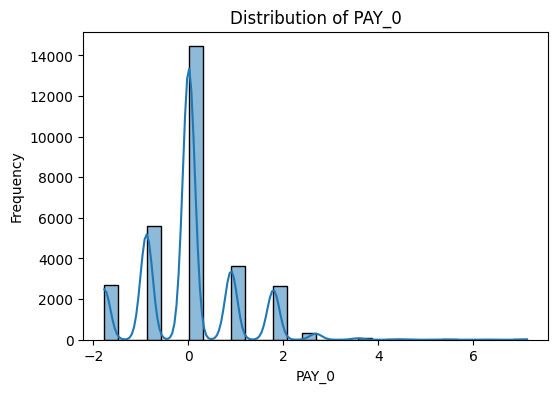

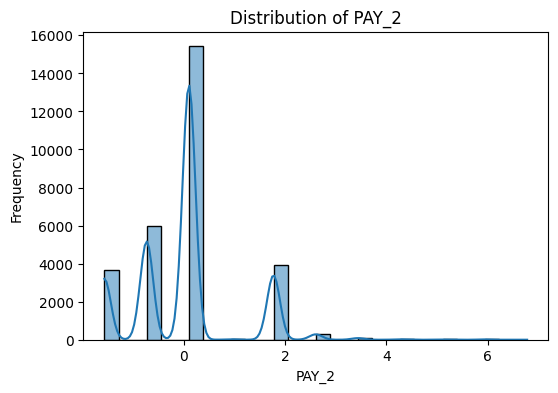

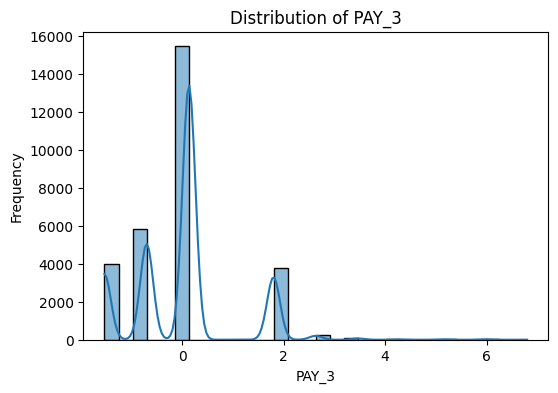

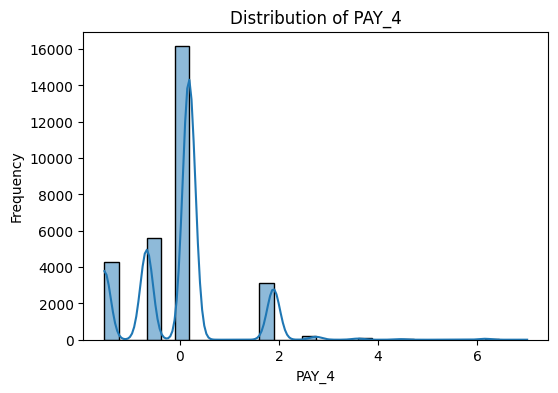

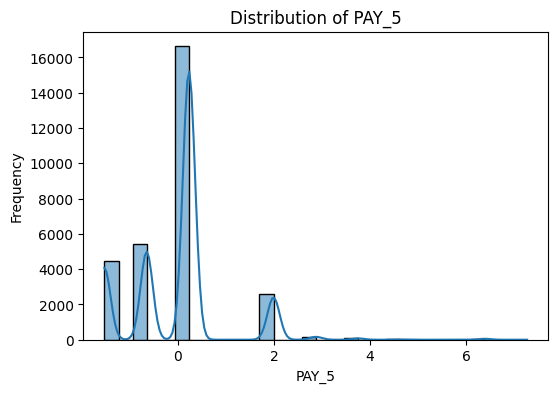

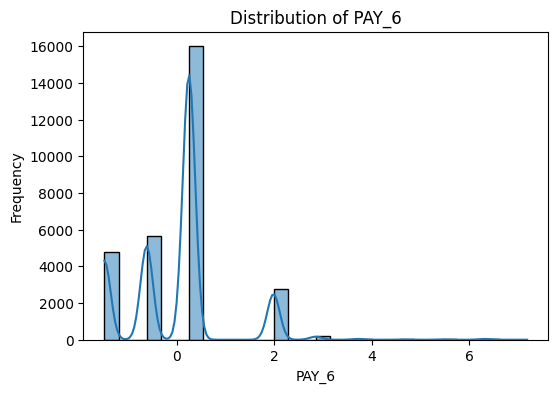

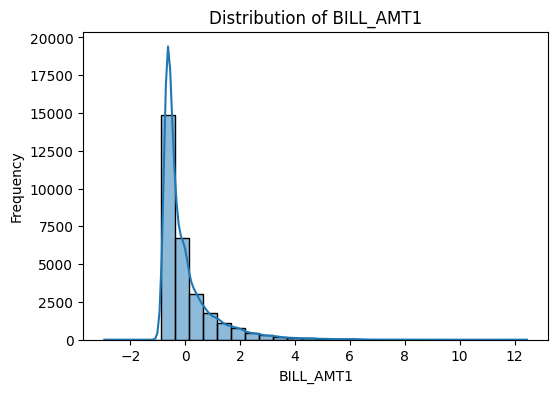

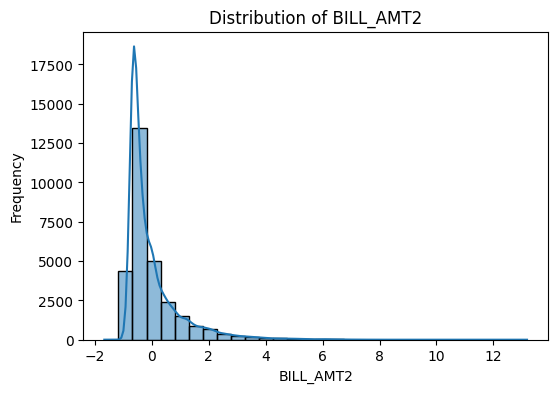

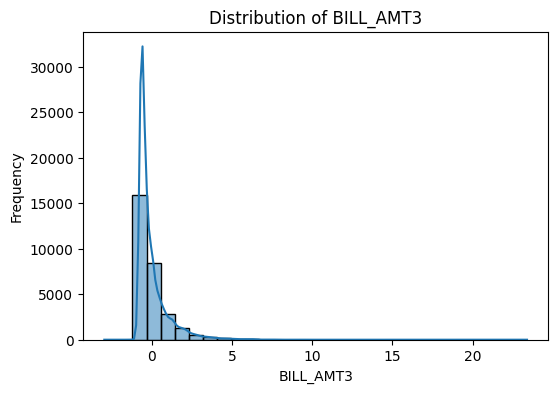

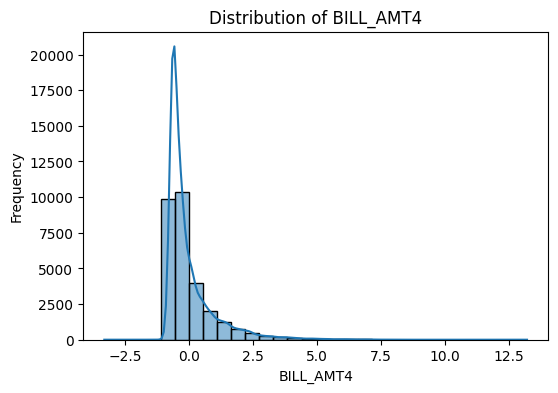

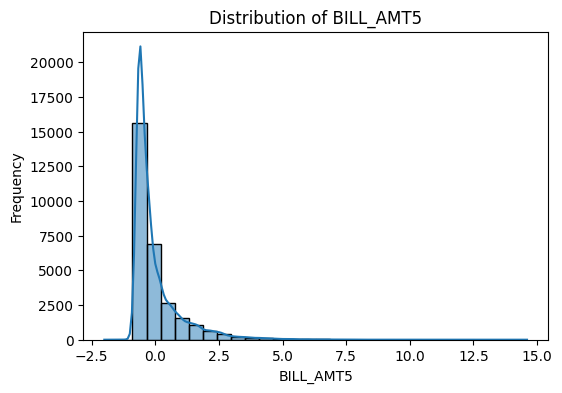

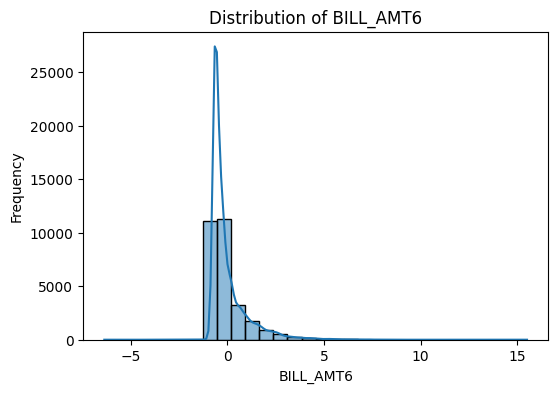

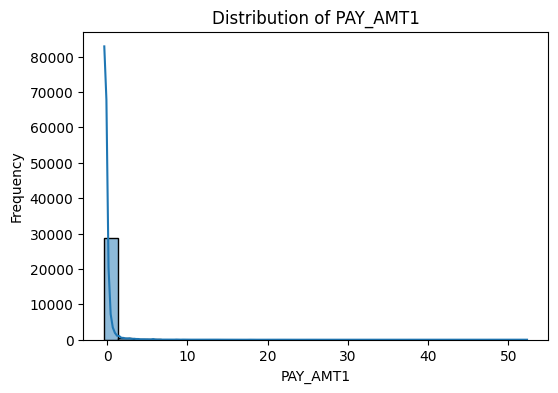

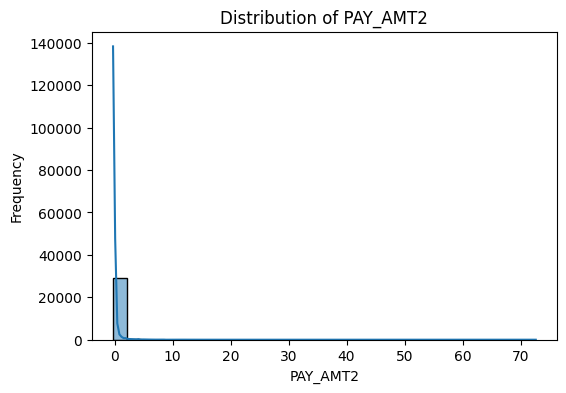

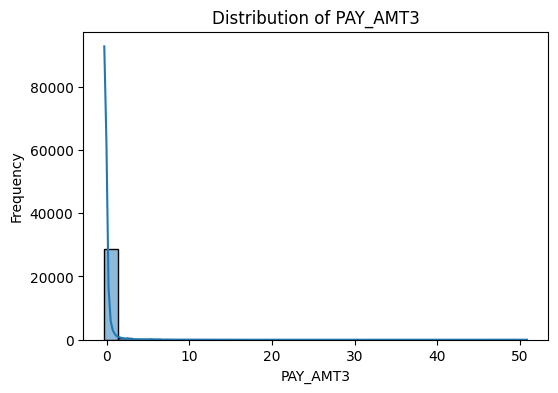

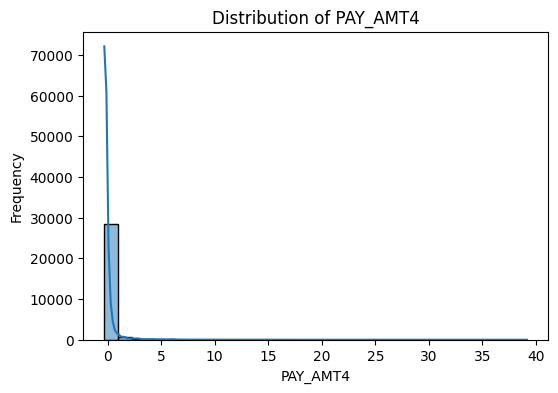

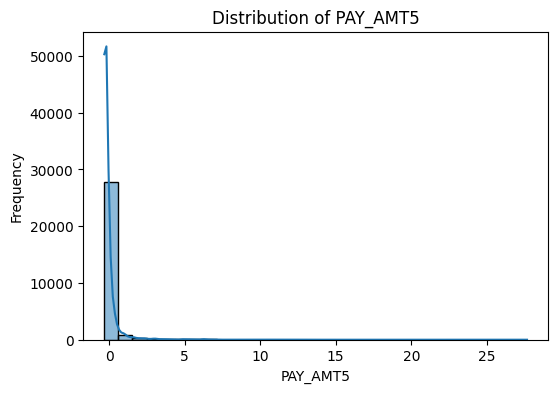

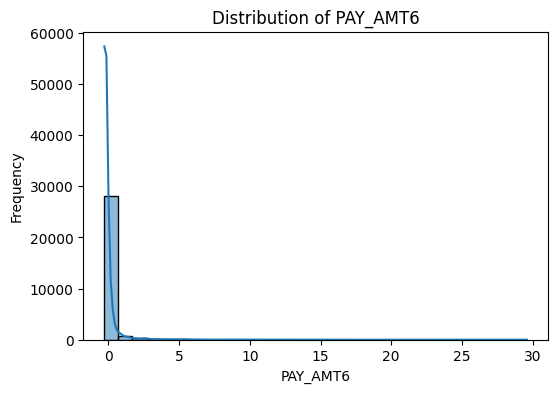

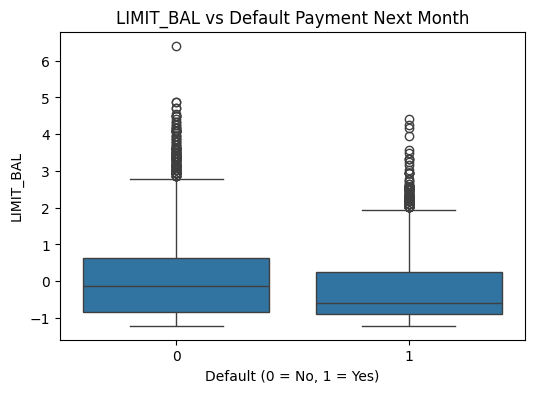

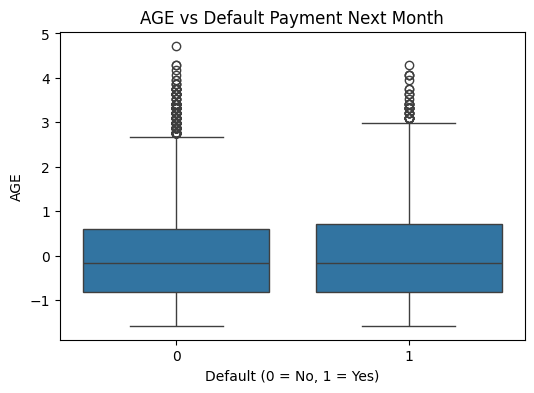

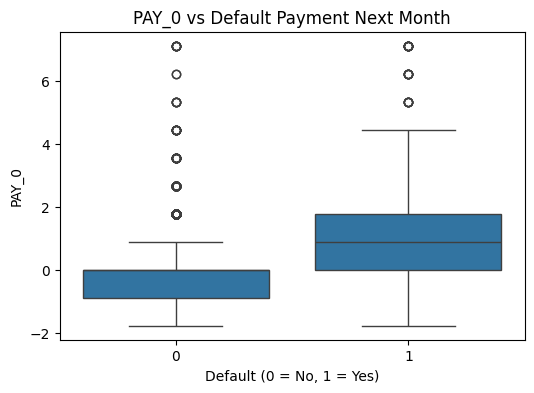

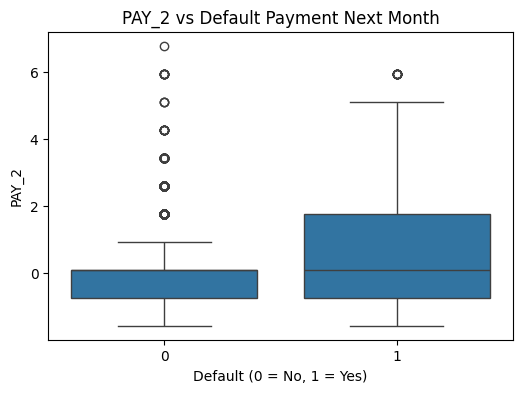

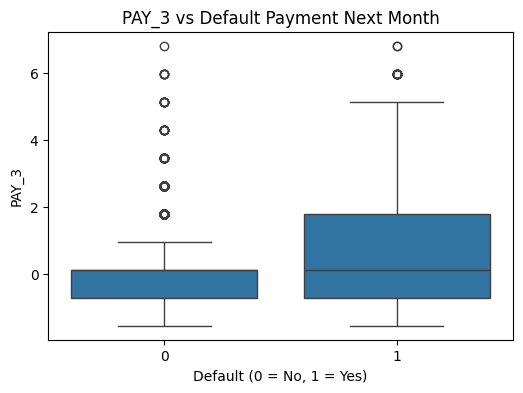

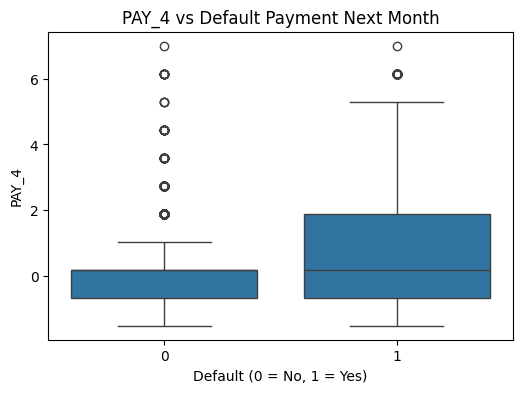

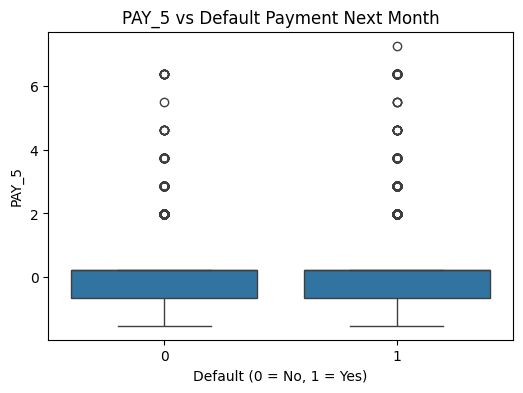

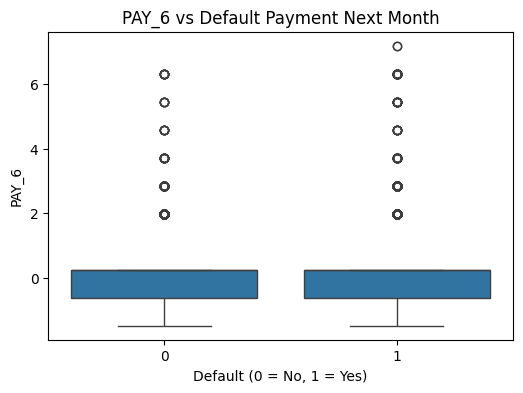

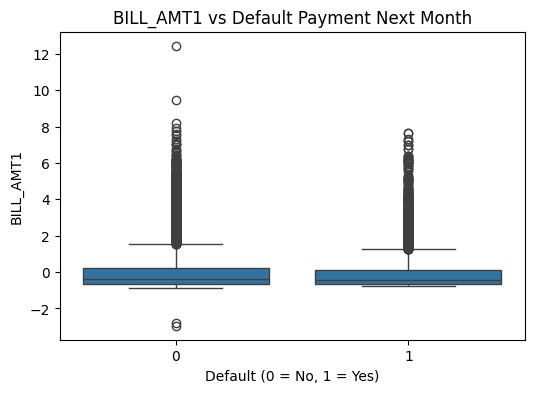

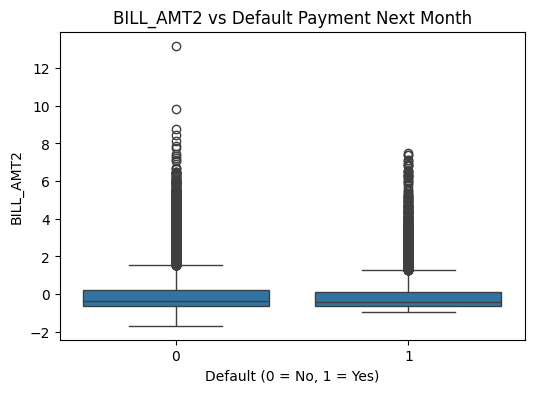

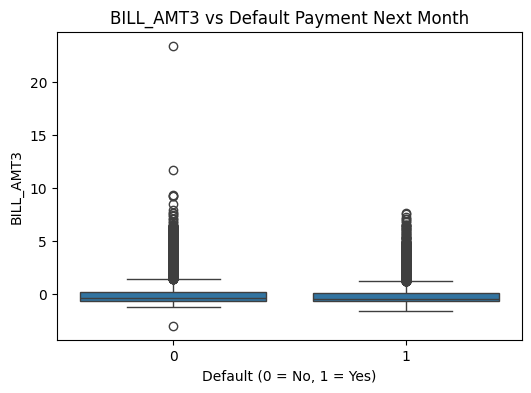

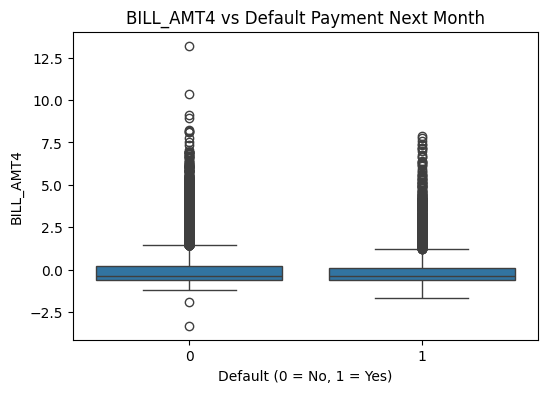

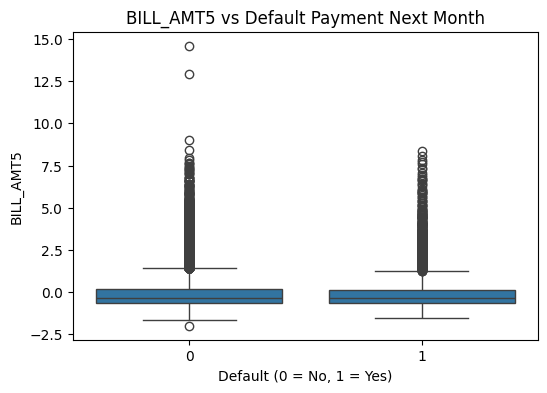

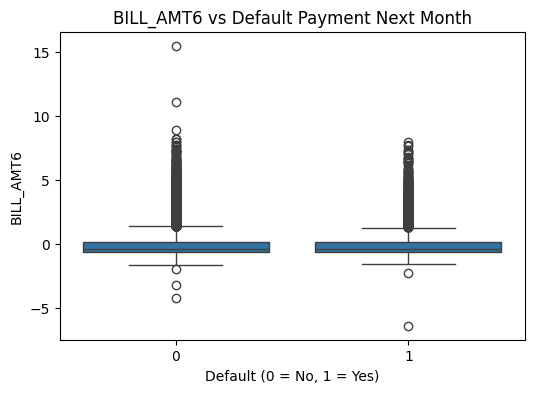

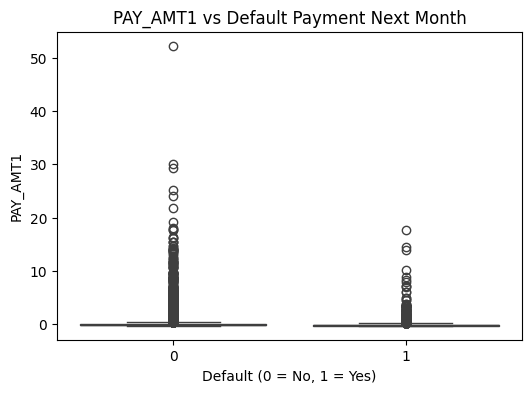

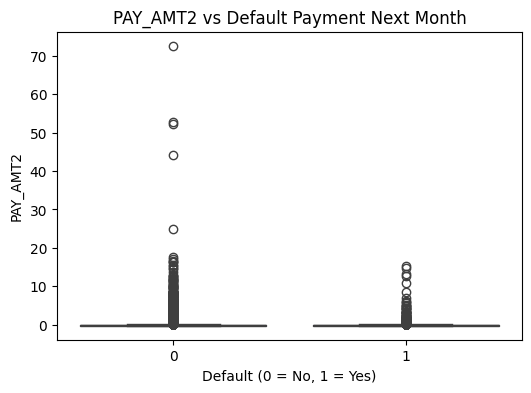

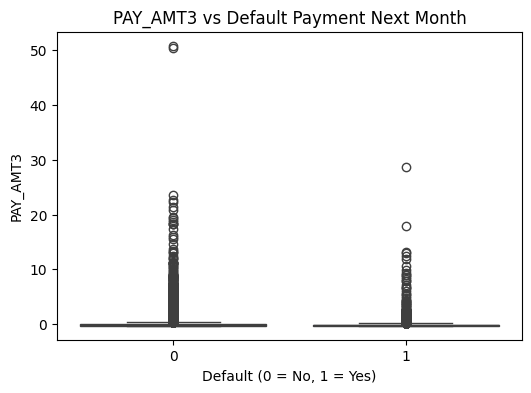

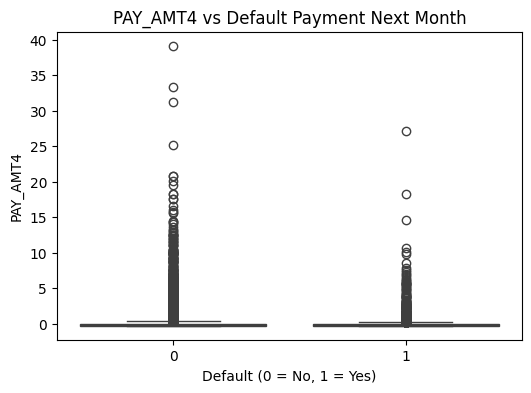

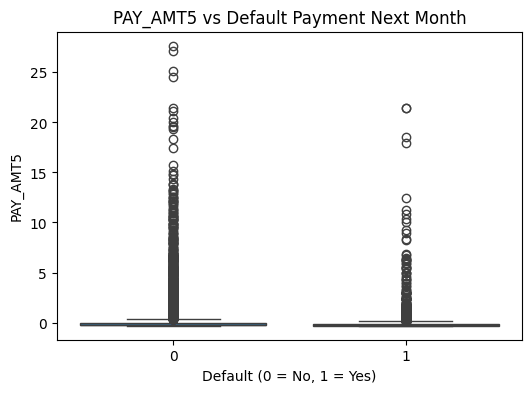

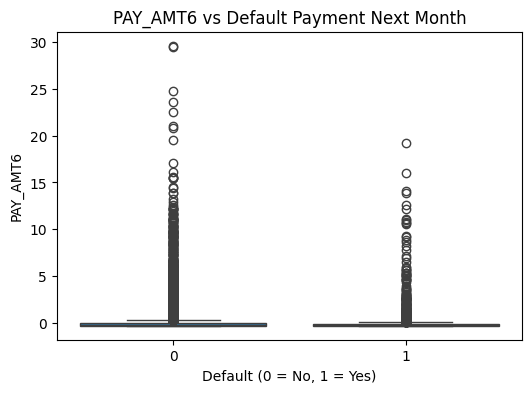

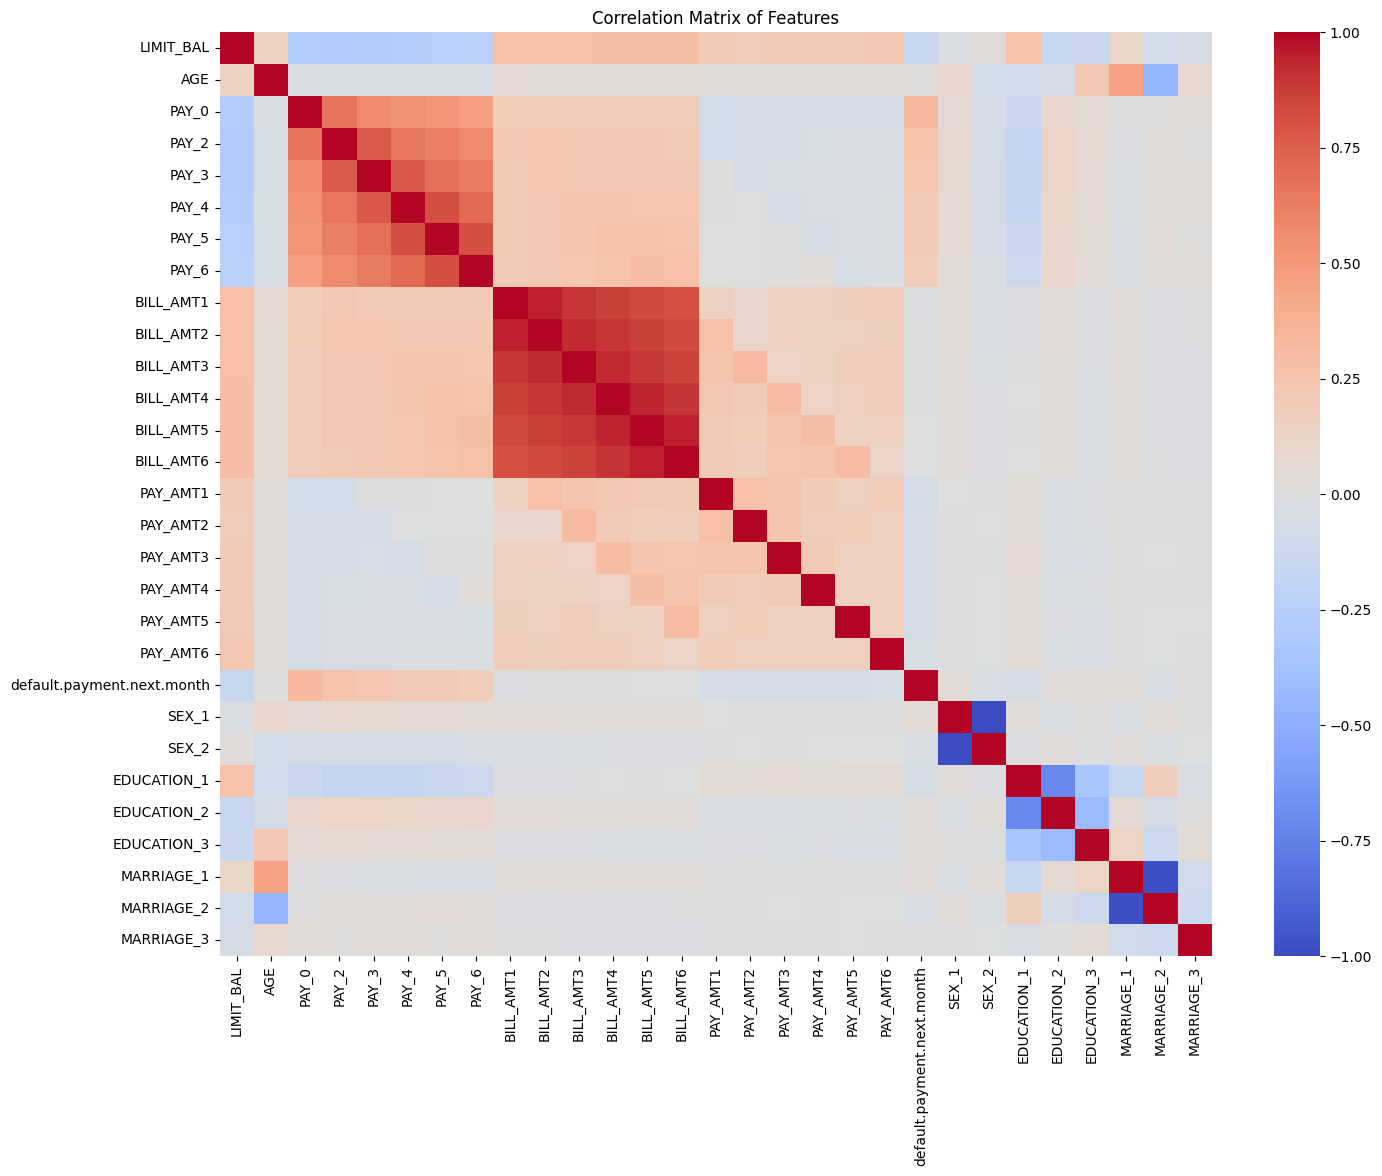

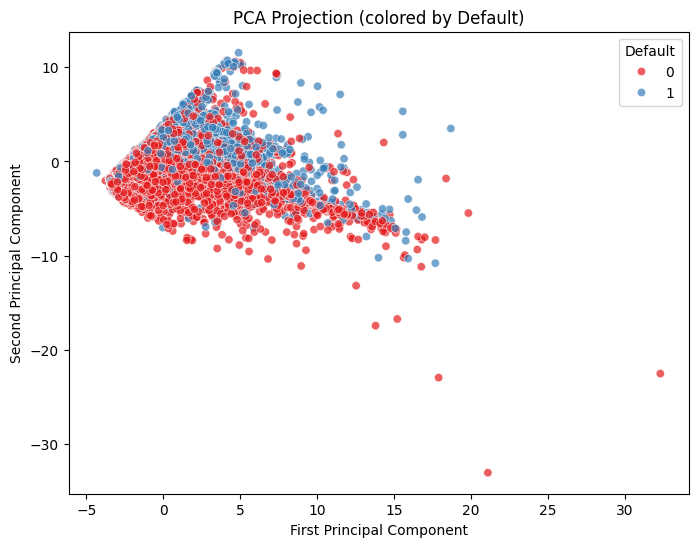

In [26]:






# List of discrete features
discrete_cols = ['SEX', 'EDUCATION', 'MARRIAGE']

# --- 1. Visualize individual feature distributions ---
for col in X.columns:
    if col not in dummy_cols: 
        plt.figure(figsize=(6, 4))
        
        if col in discrete_cols:
            sns.histplot(df[col], bins=len(df[col].unique()), discrete=True)
        else:
            sns.histplot(df[col], kde=True, bins=30)
            
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

# --- 2. Visualize feature vs. target variable ---
for col in X.columns:
    if col not in dummy_cols:
        plt.figure(figsize=(6, 4))
        sns.boxplot(x=y, y=df[col])
        plt.title(f'{col} vs Default Payment Next Month')
        plt.xlabel('Default (0 = No, 1 = Yes)')
        plt.ylabel(col)
        plt.show()

# --- 3. Correlation matrix ---
plt.figure(figsize=(16, 12))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Correlation Matrix of Features')
plt.show()

#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# --- 4. PCA for dimensionality reduction ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1', alpha=0.7)
plt.title('PCA Projection (colored by Default)')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend(title='Default')
plt.show()

In [27]:
#Interesting features of the dataset
#1) The balances seem to exponentially decay which makes sense given that many people likely owe a large amount while only a few owe a large amount
#2) The Pay graphs for Pay_2, Pay3, Pay_4, Pay_5, Pay_6 all have very low data values of 1. This suggests that the many people are able to pay on time or fall behind quickly. They rarely forget to pay by just a month. 

#3) Ther eis a strong correlation between number the Pay graphs and default rates and this makes sense because fundamentally because as a perso n accumulates credit card debt the likelihood they default goes up.




In [28]:
print(X.shape)

(29478, 28)


In [29]:
print(y.shape)

(29478,)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

print("X train", X_train)
print("X test", X_test)
print("Y train", y_train)
print("Y test", y_test)

X train        LIMIT_BAL       AGE     PAY_0     PAY_2     PAY_3     PAY_4     PAY_5  \
10470  -0.902738 -1.027590 -1.767290 -1.559287 -1.532082 -1.521464 -1.529242   
16163  -1.133563 -0.376584  0.011465  0.107186  0.134070  1.889550  0.230350   
5873   -1.056621 -0.919089 -0.877913  0.107186  0.134070  0.184043  0.230350   
29119   0.251383  1.576433 -0.877913  1.773659  1.800222 -0.668711  0.230350   
14596  -0.364148 -0.810588  0.011465  0.107186  1.800222  0.184043  0.230350   
...          ...       ...       ...       ...       ...       ...       ...   
21905  -0.594973 -0.919089  0.011465  0.107186  0.134070  0.184043  0.230350   
5457   -0.518031 -0.810588  2.679598  3.440131  2.633298  1.889550  0.230350   
870    -1.133563  1.793435  0.011465  0.107186  0.134070  0.184043  0.230350   
15995  -0.210265 -0.268083  0.011465  0.107186  0.134070  0.184043  0.230350   
24043   0.559149 -1.027590 -0.877913 -0.726050 -1.532082 -0.668711 -0.649446   

          PAY_6  BILL_AMT1  BIL

In [31]:
#Feature Transformation
# Instantiate StandardScaler
scaler = StandardScaler()

# Scale X_train and X_test
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



y_2d_train = np.array(y_train).reshape(-1, 1)
y_2d_test = np.array(y_test).reshape(-1, 1)


In [32]:
# VERIFY - Print the shape of X_train and y_2d_train
print('Q02 - X_train.shape: ', X_train.shape)
print('Q02 - y_2d_train.shape: ', y_2d_train.shape)

print("X train", X_train)
print("X test", X_test)
print("Y train", y_2d_train)
print("Y test", y_2d_test)


Q02 - X_train.shape:  (22108, 28)
Q02 - y_2d_train.shape:  (22108, 1)
X train [[-0.90371949 -1.0327722  -1.7623888  ... -0.91402976  0.93320095
  -0.10208073]
 [-1.13400571 -0.37999462  0.01337364 ...  1.09405629 -1.07158057
  -0.10208073]
 [-1.05724363 -0.92397594 -0.87450758 ... -0.91402976  0.93320095
  -0.10208073]
 ...
 [-1.13400571  1.79593065  0.01337364 ... -0.91402976 -1.07158057
   9.79616824]
 [-0.21286083 -0.27119836  0.01337364 ... -0.91402976  0.93320095
  -0.10208073]
 [ 0.55475991 -1.0327722  -0.87450758 ... -0.91402976  0.93320095
  -0.10208073]]
X test [[-0.67343327  2.01352318  0.01337364 ...  1.09405629 -1.07158057
  -0.10208073]
 [ 2.93438418  0.92556054  0.01337364 ... -0.91402976  0.93320095
  -0.10208073]
 [-0.36638497 -0.92397594  0.01337364 ... -0.91402976  0.93320095
  -0.10208073]
 ...
 [ 0.09418747  1.90472691  0.90125486 ... -0.91402976  0.93320095
  -0.10208073]
 [ 0.24771161 -0.27119836  0.90125486 ...  1.09405629 -1.07158057
  -0.10208073]
 [-0.21286083

In [33]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

# Now you can save
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

print(X_train)
print(X_test)
print(y_train)
print(y_test)

#So now X_train and X_test are standard scaled, and Y_train and Y_test are arrays of 0s and 1s

             0         1         2         3         4         5         6   \
0     -0.903719 -1.032772 -1.762389 -1.550976 -1.522556 -1.509159 -1.522347   
1     -1.134006 -0.379995  0.013374  0.109186  0.135033  1.884386  0.233865   
2     -1.057244 -0.923976 -0.874508  0.109186  0.135033  0.187614  0.233865   
3      0.247712  1.578338 -0.874508  1.769347  1.792623 -0.660773  0.233865   
4     -0.366385 -0.815180  0.013374  0.109186  1.792623  0.187614  0.233865   
...         ...       ...       ...       ...       ...       ...       ...   
22103 -0.596671 -0.923976  0.013374  0.109186  0.135033  0.187614  0.233865   
22104 -0.519909 -0.815180  2.677017  3.429509  2.621418  1.884386  0.233865   
22105 -1.134006  1.795931  0.013374  0.109186  0.135033  0.187614  0.233865   
22106 -0.212861 -0.271198  0.013374  0.109186  0.135033  0.187614  0.233865   
22107  0.554760 -1.032772 -0.874508 -0.720895 -1.522556 -0.660773 -0.644241   

             7         8         9   ...        18 